In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("F:\PGDDS\PGD_Data_Science\csv_data\student1.csv")

In [3]:
df.head()

,name,gmat,gpa,exp,admitted,country
0,samir,780,4.0,3,1,Ind
1,kaushal,750,3.9,4,1,Ind
2,nandan,690,3.3,3,0,Ind
3,ankit,710,3.7,5,1,us
4,deepika,680,3.9,4,0,Ind


In [4]:
df.shape

(42, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      42 non-null     object 
 1   gmat      42 non-null     int64  
 2   gpa       42 non-null     float64
 3   exp       42 non-null     int64  
 4   admitted  42 non-null     int64  
 5   country   42 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
df.isnull().sum()

name        0
gmat        0
gpa         0
exp         0
admitted    0
country     0
dtype: int64

In [7]:
df.drop(['name', 'country'], axis=1, inplace = True)

In [8]:
df.head()

,gmat,gpa,exp,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [11]:
X = df.drop(['admitted'], axis =1)
X.head()

,gmat,gpa,exp
0,780,4.0,3
1,750,3.9,4
2,690,3.3,3
3,710,3.7,5
4,680,3.9,4


In [12]:
y = df.admitted
y.head()

0    1
1    1
2    0
3    1
4    0
Name: admitted, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
X_train.shape

(33, 3)

In [16]:
X_test.shape

(9, 3)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier()

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
model.score(X_test, y_test)

0.7777777777777778

-Now we can plot decision tree

In [21]:
import matplotlib.pyplot as plt

In [22]:
from sklearn import tree

[Text(0.3333333333333333, 0.9166666666666666, 'X[1] <= 3.15\ngini = 0.5\nsamples = 33\nvalue = [17, 16]'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.5, 0.75, 'X[2] <= 1.5\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'X[2] <= 3.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.5, 0.4166666666666667, 'X[0] <= 730.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.25, 'X[2] <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.4166666666666667, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]')]

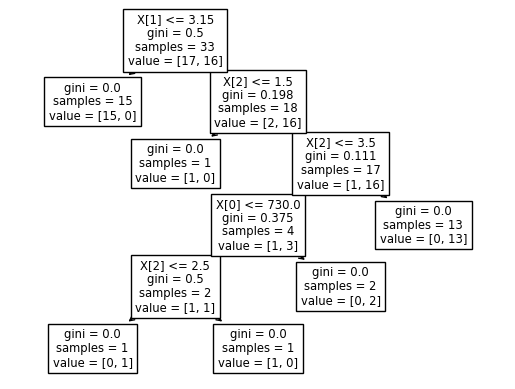

In [23]:
tree.plot_tree(model.fit(X_train, y_train))